# Overview

An inverse yield structure exists when long-term interest rates on the capital market are lower than short-term interest rates. Normally, the exact opposite is the case.

Inverse yield curves rarely occur and are considered a quite solid signal for an upcoming economic recession.

## Import libraries

In [9]:
import pandas as pd
import numpy as np
from matplotlib.dates import MonthLocator, YearLocator
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import requests
from bs4 import BeautifulSoup
import datetime
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
%matplotlib inline

## Download Yield data
We obtain the Treasury Par Yield Curve Rates from the official site of the U.S. DEPARTMENT OF THE TREASURY

In [23]:
%%time
yield_ = pd.DataFrame(columns=['1Mo','2Mo','3Mo','6Mo','1Yr','2Yr','3Yr','5Yr','7Yr','10Yr','20Yr','30Yr'])
time_range = range(1990,2023,1)
base_url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value="

for i,year in enumerate(time_range):
    url = base_url + str(year)
    data = requests.get(url).text
    soup = BeautifulSoup(data, 'html.parser')
    table = soup.find('table')
    df_soup = pd.read_html(str(table))[0]
    # rearrange 
    df_soup = df_soup[['1 Mo','2 Mo','3 Mo','6 Mo','1 Yr','2 Yr','3 Yr','5 Yr','7 Yr','10 Yr','20 Yr','30 Yr']]
    df_soup.columns = ['1Mo','2Mo','3Mo','6Mo','1Yr','2Yr','3Yr','5Yr','7Yr','10Yr','20Yr','30Yr']
    df_soup.index = pd.to_datetime(pd.read_html(str(table))[0]['Date'])
    # append and delete duplicates
    yield_ = yield_.append(df_soup, ignore_index=False)
yield_.to_pickle("yield_data.pkl")
yield_.to_csv("yield_data.csv")
yield_

Wall time: 25.3 s


,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.18,0.42,0.66,1.14,1.72,2.43,2.61,2.56,2.52,2.42,2.64,2.48
2022-04-05,0.18,0.42,0.65,1.13,1.77,2.51,2.69,2.69,2.65,2.54,2.74,2.57
2022-04-06,0.21,0.44,0.67,1.15,1.79,2.50,2.67,2.70,2.69,2.61,2.81,2.63
2022-04-07,0.21,0.50,0.68,1.15,1.78,2.47,2.66,2.70,2.73,2.66,2.87,2.69


## Calculation - Proportion how many yield curves are inverted?

In [4]:
def highlight_negative_values(cell):
    if type(cell) != str and cell < 0 :
        return 'color: red'
    else:
        return 'color: black'

def time_ft(time):
    return str(time.strftime("%Y%m%d"))

def calculate_matrix():
    df = pd.DataFrame(np.zeros((len(yield_.columns),len(yield_.columns))))
    df.index = considered_yield_data.index
    df.columns = df.index 
    df[:] = np.nan
    for hor in range(0,len(df.index)):
        for ver in range(0,len(df.index)):
            if hor>ver:
                df.iloc[hor,ver] = considered_yield_data.iloc[hor]-considered_yield_data.iloc[ver]
    available_entries = (len(df))**2 - df.isna().sum().sum()
    negative_entries = np.sum((df < 0).values.ravel())
    inverted_percentage = round(negative_entries/available_entries*100,1)
    return inverted_percentage, df.style.applymap(highlight_negative_values)

def add_patch(startdate,enddate):
    start = mdates.date2num(startdate)
    end = mdates.date2num(enddate)
    width = end - start
    range_in_days = (enddate-startdate).days
    rect = Rectangle((start, ax.get_ylim()[0]), width, ax.get_ylim()[1] - ax.get_ylim()[0], color='yellow',alpha = 0.15)
    ax.add_patch(rect)

### One specific date

In [6]:
yield_ = pd.read_pickle("yield_data.pkl")
considered_date = "2022-04-08"
considered_yield_data = yield_.loc[considered_date]
print("Proportion how many yield curves are inverted: " + str(calculate_matrix()[0]) + "%")
calculate_matrix()[1]

Proportion how many yield curves are inverted: 7.6%


,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr
1Mo,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2Mo,0.290000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3Mo,0.500000,0.210000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6Mo,0.990000,0.700000,0.490000,nan,nan,nan,nan,nan,nan,nan,nan,nan
1Yr,1.610000,1.320000,1.110000,0.620000,nan,nan,nan,nan,nan,nan,nan,nan
2Yr,2.330000,2.040000,1.830000,1.340000,0.720000,nan,nan,nan,nan,nan,nan,nan
3Yr,2.530000,2.240000,2.030000,1.540000,0.920000,0.200000,nan,nan,nan,nan,nan,nan
5Yr,2.560000,2.270000,2.060000,1.570000,0.950000,0.230000,0.030000,nan,nan,nan,nan,nan
7Yr,2.590000,2.300000,2.090000,1.600000,0.980000,0.260000,0.060000,0.030000,nan,nan,nan,nan
10Yr,2.520000,2.230000,2.020000,1.530000,0.910000,0.190000,-0.010000,-0.040000,-0.070000,nan,nan,nan


### Time period

In [8]:
%%time
yield_ = pd.read_pickle("yield_data.pkl")
inverted_percentage = [] 
for u in range(0,(yield_.shape[0])):
    considered_yield_data = yield_.iloc[u]
    inverted_percentage.append(calculate_matrix()[0])
yield_["inverted_percentage"] = inverted_percentage
yield_

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


Wall time: 37.3 s


,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr,inverted_percentage
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,16.7
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,16.7
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,13.9
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,8.3
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.18,0.42,0.66,1.14,1.72,2.43,2.61,2.56,2.52,2.42,2.64,2.48,16.7
2022-04-05,0.18,0.42,0.65,1.13,1.77,2.51,2.69,2.69,2.65,2.54,2.74,2.57,13.6
2022-04-06,0.21,0.44,0.67,1.15,1.79,2.50,2.67,2.70,2.69,2.61,2.81,2.63,12.1
2022-04-07,0.21,0.50,0.68,1.15,1.78,2.47,2.66,2.70,2.73,2.66,2.87,2.69,7.6


## Recessions 
When did economic recessions take place

In [10]:
### https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States
from datetime import date
r1_start,r1_end = date(1990,7,1), date(1991,3,1)
r2_start,r2_end = date(2001,3,1), date(2001,11,1)
r3_start,r3_end = date(2007,12,1), date(2009,6,1)
r4_start,r4_end = date(2020,2,1), date(2020,4,1)

recessions = [[r1_start,r1_end],
              [r2_start,r2_end],
              [r3_start,r3_end],
              [r4_start,r4_end]]

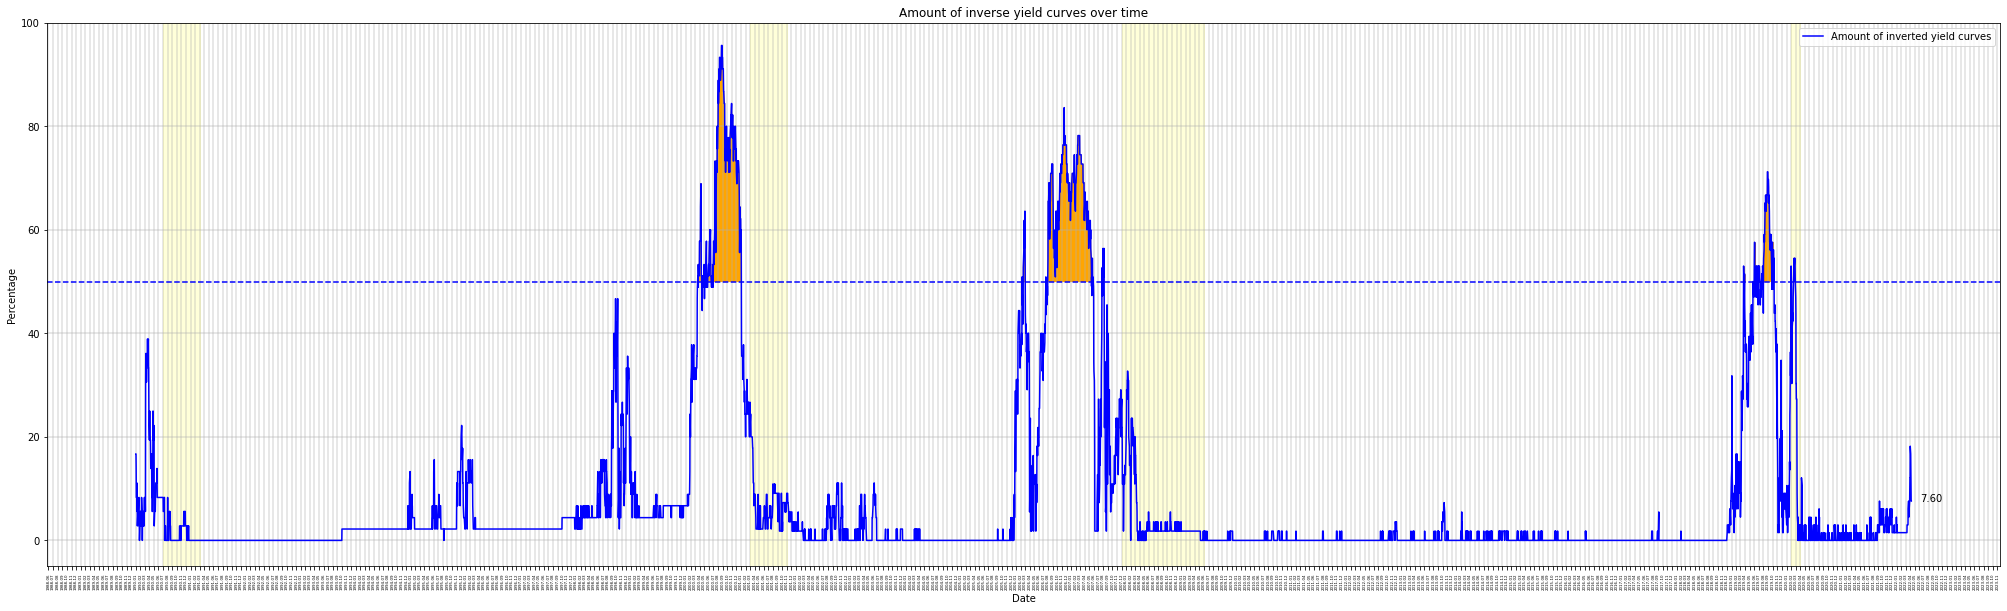

In [21]:

fig,ax = plt.subplots(figsize=(35,10))
ax.plot(yield_.index, yield_["inverted_percentage"], label='Amount of inverted yield curves', linewidth=1.5, color = "blue")
ax.axhline(y=50, linewidth = 1.5, linestyle='--', color = "blue")
ax.set_ylim(-5,100)

# add recessions as a rectangle inside the figure
for i,_ in enumerate(recessions):
    add_patch(recessions[i][0],recessions[i][1])
    
# Annotation - current value
ax.annotate('%0.2f' % yield_["inverted_percentage"].iloc[-1], xy=(1, yield_["inverted_percentage"].iloc[-1]), xytext=(-80, 0), 
                     xycoords=('axes fraction', 'data'), textcoords='offset points')


## critical area
treshold = 50
ax.fill_between(yield_.index, yield_["inverted_percentage"], treshold,
                      where=(treshold < yield_["inverted_percentage"]),
                      facecolor='orange', edgecolor='orange', alpha=1)

legend = ax.legend(loc='upper right')

mloc = MonthLocator()
ax.xaxis.set_major_locator(mloc)
ax.grid(True,linewidth=2,alpha = 0.3)

# Labeling
plt.xticks(fontsize=4, rotation=90)
ax.set_title('Amount of inverse yield curves over time')
plt.ylabel('Percentage')
plt.xlabel("Date")

# save figure
pdf_name = "Yield.pdf"
plt.savefig(pdf_name)

## Banks Tightening Standards for Commercial and Industrial Loans

Net Percentage of Domestic Banks Tightening Standards for Commercial and Industrial LoansNet Percentage of Domestic Banks Tightening Standards for Commercial and Industrial Loans

Number of regional banks in the U.S. that stop lending (Thightening Standards).
If a bank fears bad times are coming, then it will lend less. If banks hold back to the maximum, then there will potentially a crashNet Percentage of Domestic Banks Tightening Standards for Commercial and Industrial LoansNet Percentage of Domestic Banks Tightening Standards for Commercial and Industrial Loans

Number of regional banks in the U.S. that stop lending (Thightening Standards).
If a bank fears bad times are coming, then it will lend less. If banks hold back to the maximum, then there will potentially a crash

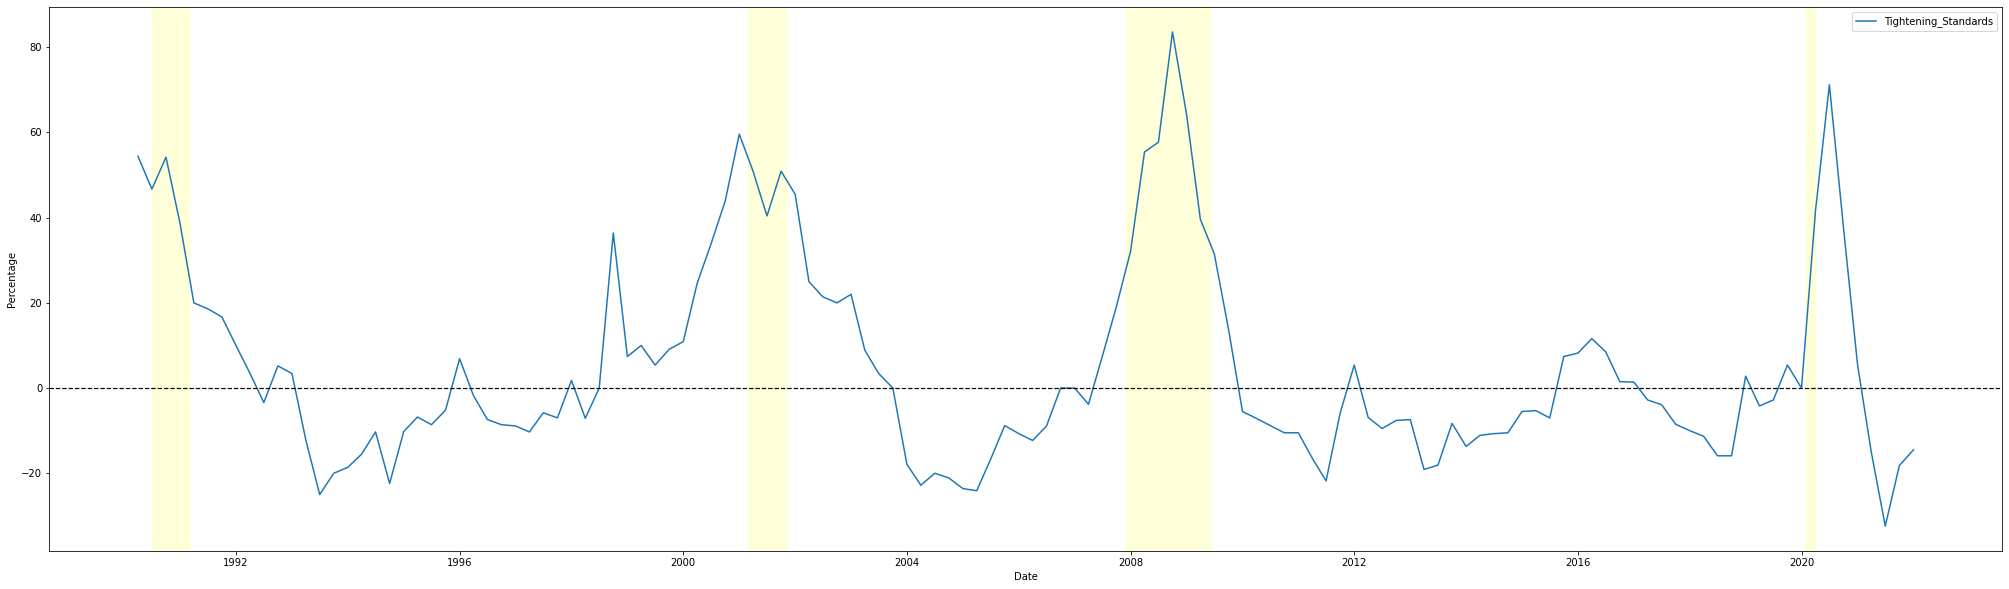

In [22]:
# https://fred.stlouisfed.org/series/DRTSCILM
Tightening_Standards_csv = r"C:\Users\andre\OneDrive/Dokumente/Programmieren/python/projects/Finance/20210419 negative_inverse_Zinsstruktur/DRTSCILM.csv"
Tightening_Standards_df = pd.read_csv(Tightening_Standards_csv, sep=',')

Tightening_Standards_df.index = pd.to_datetime(Tightening_Standards_df["DATE"])
Tightening_Standards_df.drop(['DATE'], axis=1,inplace = True)
fig,ax = plt.subplots(figsize=(35,10))
ax.plot(Tightening_Standards_df.index, Tightening_Standards_df["DRTSCILM"], label='Tightening_Standards', linewidth=1.5)
ax.axhline(y=0, color='k', linewidth = 1.2, linestyle='--')
for i,_ in enumerate(recessions):
    add_patch(recessions[i][0],recessions[i][1])
    
plt.ylabel('Percentage')
plt.xlabel("Date")
legend = ax.legend(loc='upper right')

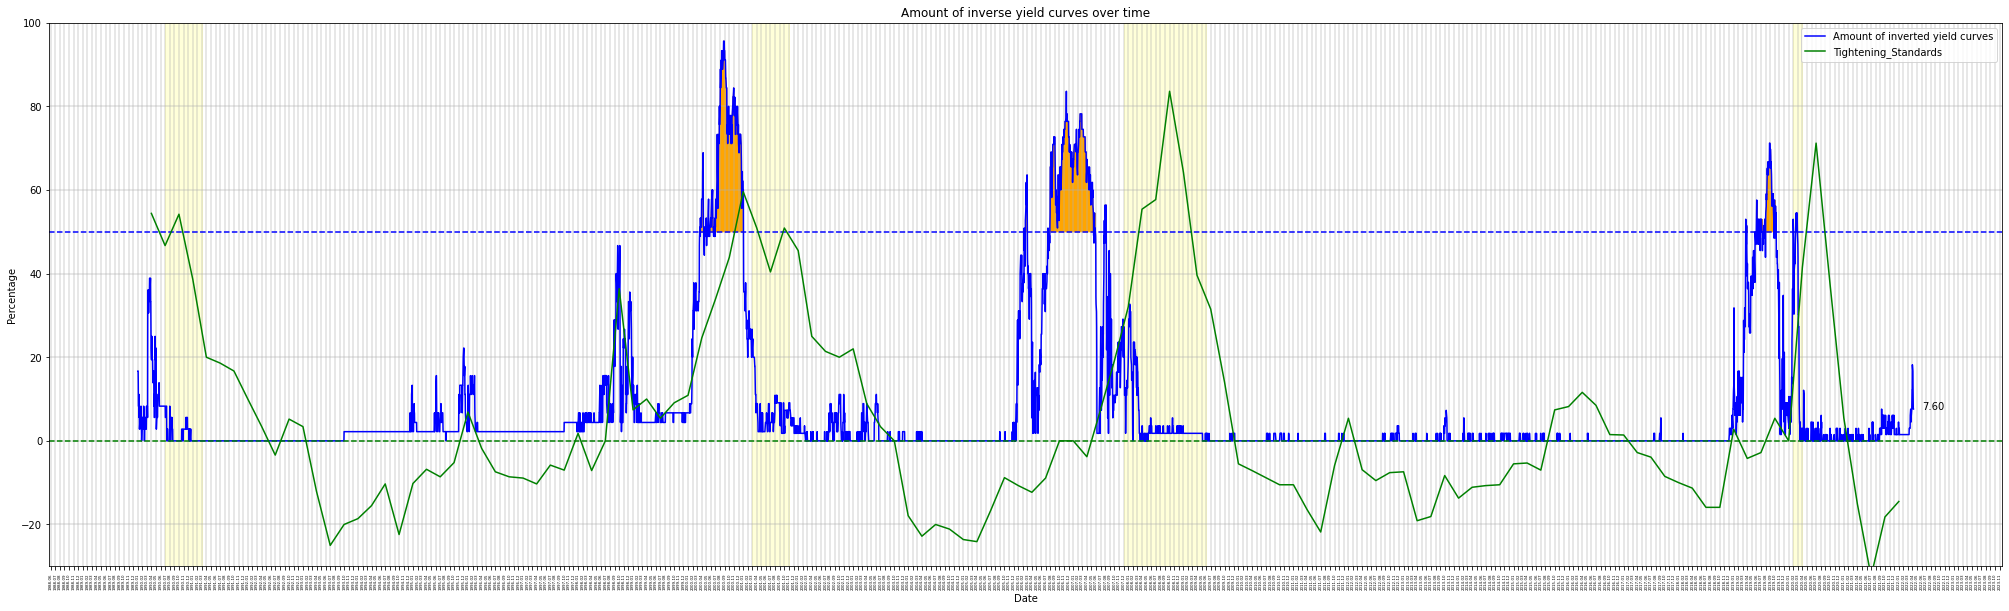

In [20]:
yield_part = pd.read_pickle("yield_data.pkl")

fig,ax = plt.subplots(figsize=(35,10))
ax.plot(yield_.index, yield_["inverted_percentage"], label='Amount of inverted yield curves', linewidth=1.5, color = "blue")
ax.axhline(y=50, linewidth = 1.5, linestyle='--', color = "blue")
ax.set_ylim(-30,100)

# add recessions as a rectangle inside the figure
for i,_ in enumerate(recessions):
    add_patch(recessions[i][0],recessions[i][1])
    
# Annotation - current value
ax.annotate('%0.2f' % yield_["inverted_percentage"].iloc[-1], xy=(1, yield_["inverted_percentage"].iloc[-1]), xytext=(-80, 0), 
                     xycoords=('axes fraction', 'data'), textcoords='offset points')

ax.plot(Tightening_Standards_df.index, Tightening_Standards_df["DRTSCILM"], label='Tightening_Standards', linewidth=1.5,color = "green")
ax.axhline(y=0, linewidth = 1.5, linestyle='--',color = "green")
## critical area
treshold = 50
ax.fill_between(yield_.index, yield_["inverted_percentage"], treshold,
                      where=(treshold < yield_["inverted_percentage"]),
                      facecolor='orange', edgecolor='orange', alpha=1)

legend = ax.legend(loc='upper right')

mloc = MonthLocator()
ax.xaxis.set_major_locator(mloc)
ax.grid(True,linewidth=2,alpha = 0.3)

# Labeling
plt.xticks(fontsize=4, rotation=90)
ax.set_title('Amount of inverse yield curves over time')
plt.ylabel('Percentage')
plt.xlabel("Date")

# save figure
pdf_name = "Yield.pdf"
plt.savefig(pdf_name)